In [1]:
%matplotlib inline
from pylab import *
import vispy
import extractors as e

/home/cottrell/dev/pandas-datareader/pandas_datareader/iex/stats.py:24: UnstableAPIWarning: Daily statistics is not working due to issues with the IEX API
  'IEX API', UnstableAPIWarning)


In [2]:
df = e.pdr_yahoo_price_volume.load()

read_parquet /home/cottrell/projects/data/extractors/pdr/yahoo_price_volume
... took 6.277642011642456 seconds
coalescing to latest by ['symbol', 'date']
df.shape = (10221472, 10) (before)
df.shape = (10205747, 10) (after)
... took 1.908553123474121 seconds


In [3]:
df.shape

(10205747, 10)

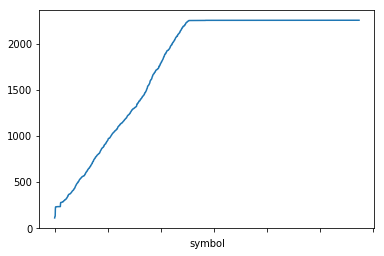

In [18]:
s = df.groupby('symbol').close.count()
s = s[s > 100]
s.sort_values().plot()

df = df[df.symbol.isin(s.index)]

In [319]:
df.shape

(10203843, 10)

In [28]:
df.head()

,date,high,low,open,close,volume,adj close,ingress_time,product,symbol
6701929,2013-05-22,451.717010,440.574493,448.363831,441.836273,5154400.0,441.836273,2018-12-17 01:30:30.448597,stocks,goog
6701804,2012-11-20,336.809387,330.137787,332.591797,332.820312,4204400.0,332.820312,2018-12-17 01:30:30.448597,stocks,goog
6701803,2012-11-19,332.298706,325.646973,325.731445,331.946014,4767200.0,331.946014,2018-12-17 01:30:30.448597,stocks,goog
6701802,2012-11-16,324.400085,315.945068,320.907806,321.498962,6920900.0,321.498962,2018-12-17 01:30:30.448597,stocks,goog
6701801,2012-11-15,327.867523,319.869568,322.899841,321.538696,3721700.0,321.538696,2018-12-17 01:30:30.448597,stocks,goog


In [19]:
class RandomSampler():
    def __init__(self, df, symcol=['symbol']):
        self._symbols = df.symbol.unique()
        self._symcol = symcol
    def sample(self, n=8):
        i = np.random.permutation(self._symbols)[:n]
        return df[df.symbol.isin(i)]

rs = RandomSampler(df)

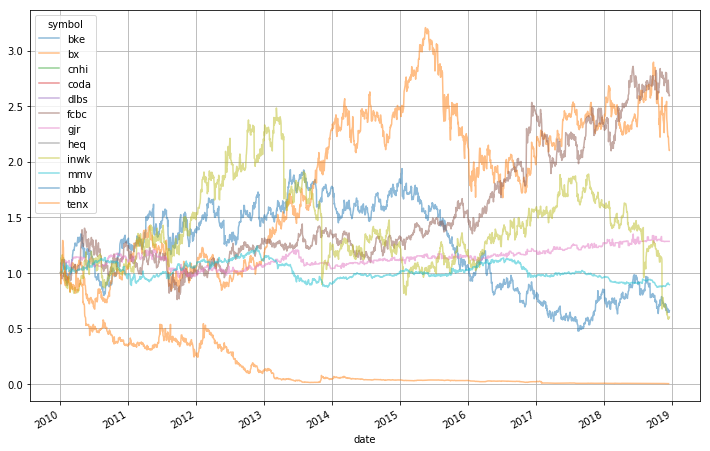

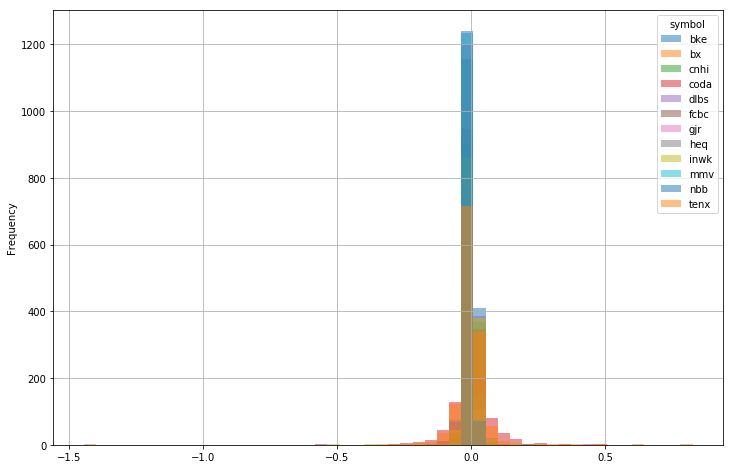

In [22]:
def plot_random(n=12, df=df):
    d = rs.sample(n=n)
    d = d.set_index(['date', 'symbol']).close.unstack('symbol')
    dd = (d / d.iloc[0,:])
    figure(figsize=(12, 8))
    ax = gca()
    dd.plot(ax=ax, alpha=0.5)
    grid()
    dd = np.log(d).diff().dropna()
    figure(figsize=(12, 8))
    ax = gca()
    dd.plot(ax=ax, alpha=0.5, kind='hist', bins=50)
    grid()
    return d

d = plot_random()

# TODO: what does dist look like across different periods?

In [77]:
import scipy.stats.distributions as ssd
k = d.columns[0]
print(k)
x = d[k]


def get_diffs(x, n):
    t = np.diff(x.values, n=n)
    d = dict()
    for i in range(n):
        d[i] = t[i::n]
    return d


t = get_diffs(x, 5)

def get_dists(x, n, int_dist=ssd.norm, dist=ssd.genpareto, alpha=0.25):
    t = get_diffs(x, n)
    d = dict()
    for i in t:
        # split three chunks, look at norm inside and dist outside


bke


,0,1,2,3,4,5
0,-20.896391,14.549345,-6.552071,4.872541,-6.337248,3.183273
1,2.079872,-2.411865,-1.074118,2.216570,0.888609,-6.200596
2,12.274221,-14.256445,6.630228,2.470451,-3.398096,7.225853
3,-20.290997,25.270987,-17.205360,11.287956,-13.035828,16.551113
4,-16.560881,12.635479,-8.573366,6.122425,-3.993727,2.353270
5,-2.792685,4.101147,-1.991974,-3.105181,4.315996,1.562332
6,-10.858295,16.199575,-10.008781,-4.853050,15.398912,-14.715408
7,7.186855,-0.234394,-2.372803,2.363060,-2.880581,3.193024
8,-2.187248,0.419846,3.280968,-7.811787,9.510841,-8.358593
9,5.761162,-1.894329,-1.249901,0.097664,3.798439,-5.185005


# Misc stats remembering

(2255,)
lognorm      262.413003
genpareto    261.786652
expon        260.989059
pareto       254.837322
dtype: float64
genpareto    282.212077
expon        281.965080
lognorm      277.696271
pareto       274.109135
dtype: float64


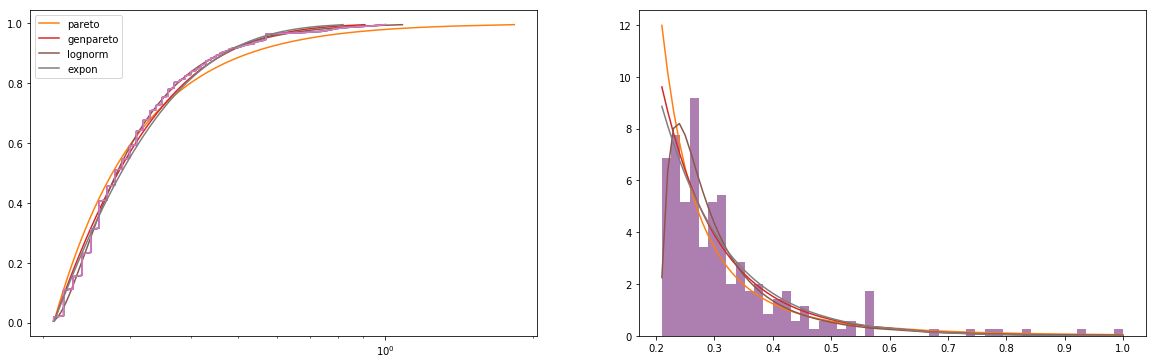

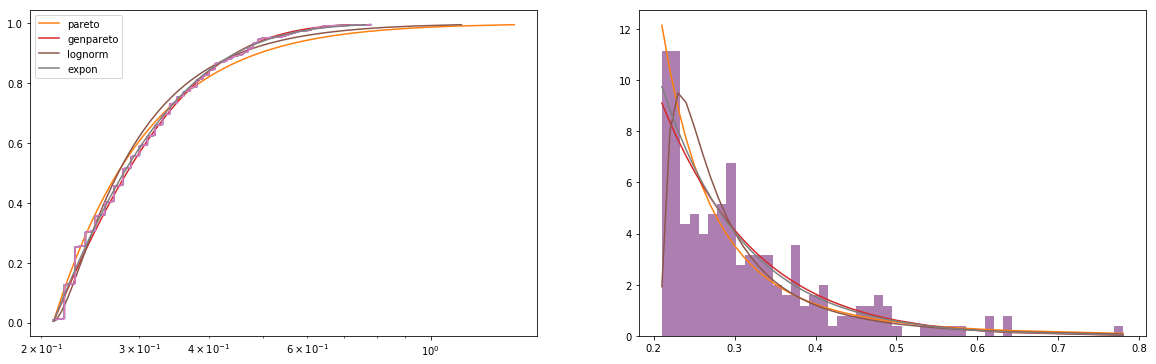

In [318]:
x = d.iloc[:,0].diff().dropna().values.copy()
print(x.shape)

sigma = np.diff(np.quantile(x, [0.25, 0.75]))[0]
for xx in [-x[x<-sigma], x[x>sigma]]:
    n = len(xx)
    xx = xx.copy()
    xx.sort()
    p = np.linspace(1/n, 1 - 1/n, n)

    figure(figsize=(20, 6))
    dists = [ssd.pareto, ssd.genpareto, ssd.lognorm, ssd.expon]
    l = pd.Series()
    for dist in dists:
        _ = dist.fit(xx)
        r = dist(*_)
        subplot(1,2,1)
        plot(xx, p)
        plot(r.ppf(p), p, label=dist.name)
        ax = gca()
        ax.set_xscale('log')
        grid()
        legend()

        subplot(1,2,2)
        hist(xx, bins=50, alpha=0.5, density=True)
        likelihood = np.log(r.pdf(xx)).sum()
        l[dist.name] = likelihood
        plot(xx, r.pdf(xx), label=dist.name)
        grid()
    print(l.sort_values(ascending=False))

In [307]:
x.std(), sigma

(0.7096915149395784, 0.7699985504150391)

In [170]:
p = np.linspace(0, 1, 101)
q = d.quantile(p)

n = 10
f = (np.diff(p, n=n) / q.diff(periods=n).dropna().T).T

In [182]:
import scipy.stats as ss
import scipy.stats.distributions as ssd

In [189]:
r = ssd.pareto?


In [198]:
r = ssd.genpareto(loc=0, scale=1)

TypeError: _parse_args() missing 1 required positional argument: 'c'

In [ ]:
r = ssd.pareto(*ssd.pareto.fit(d[k].dropna()))

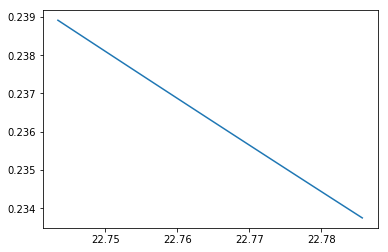

In [180]:
x = np.linspace(*r.interval(0.01), 100)
f = r.pdf(x)
plot(x, f)

In [181]:
x.mean()

22.76454377142237